In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file (already done in your code)
#--stepwise
csv_path = "/Users/amirgazar/Documents/GitHub/Decarbonization-Tradeoffs/2 Generation Expansion Model/5 Dispatch Curve/4 Final Results/1 Comprehensive Days Summary Results/Battery_Data.csv"
yearly_results = pd.read_csv(csv_path)

yearly_results = yearly_results[yearly_results['Pathway'] != 'A']
yearly_results['CO2_mtons'] = yearly_results['CO2_tons'] / 1e6

In [3]:
columns_to_summarize = ['RP_mean', 'Battery_Discharges_TWh', 'Shortages_TWh', 'CO2_mtons']  
yearly_results = yearly_results.groupby(['Pathway', 'Year'])[columns_to_summarize].mean().reset_index()
print(yearly_results.max()*10)

Pathway                   DDDDDDDDDD
Year                           20500
RP_mean                     7.414551
Battery_Discharges_TWh     15.392016
Shortages_TWh               4.518662
CO2_mtons                  28.225519
dtype: object


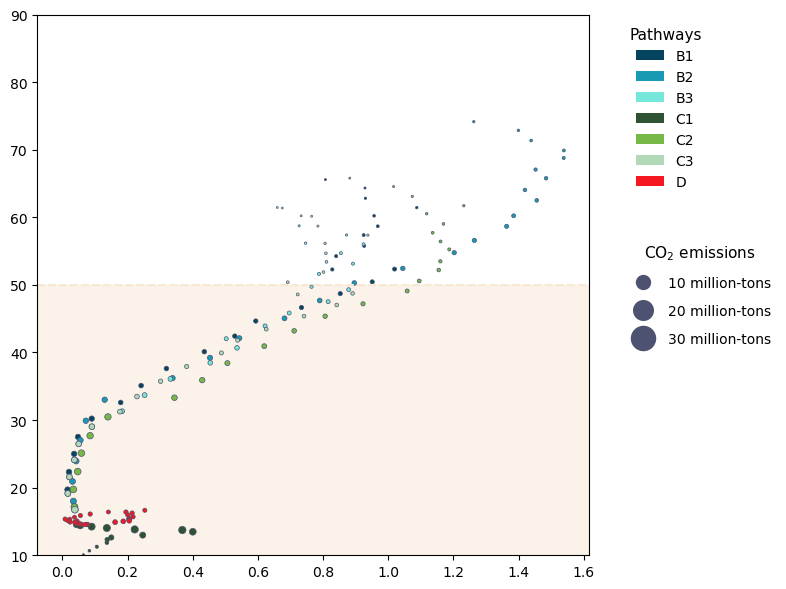

In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Convert RP_mean to percentages for the y-axis
yearly_results["RP_mean_percent"] = yearly_results["RP_mean"] * 100

# Explicitly define improved pastel colors for each pathway
unique_pathways = yearly_results["Pathway"].unique()
pathway_colors = {
    "A": "grey",
    "B1": "#05445E",  # Muted pastel blue
    "B2": "#189AB4",  # Muted pastel light blue
    "B3": "#75E6DA",  # Muted pastel sky blue
    "C1": "#2F5233",  # Muted pastel lavender
    "C2": "#76B947",  # Muted pastel pink lavender
    "C3": "#B1D8B7",  # Muted pastel light pink
    "D": "#F51720",   # Muted pastel gold
}



# Create the scatter plot
plt.figure(figsize=(8, 6))

# Add light pink shading between 10% and 50% (excluded from legend)
plt.axhspan(10, 50, color="#f9e8d4", alpha=0.5)
# Add a dashed horizontal line at 50% (excluded from legend)
plt.axhline(y=50, color="#f9e8d4", linestyle="--", linewidth=1.5)

for pathway in unique_pathways:
    subset = yearly_results[yearly_results["Pathway"] == pathway]
    plt.scatter(
        subset["Battery_Discharges_TWh"],  # x-axis
        subset["RP_mean_percent"],  # y-axis
        s=subset["CO2_mtons"]*10,  # Bubble size
        color=pathway_colors.get(pathway, "#D3D3D3"),  # Default to light gray if not in predefined colors
        edgecolors="#4C5270",  # Edge color
        linewidth=0.5, label=pathway
    )

# Add labels and title
#plt.xlabel("Battery Discharges (TWh)", fontsize=12)
#plt.ylabel("RP Mean (%)", fontsize=12)

# Create custom legends
# Legend for colors (pathways)
from matplotlib.patches import Patch

color_legend_labels = [
    Patch(facecolor=pathway_colors[pathway], label=pathway)
    for pathway in unique_pathways
]


# Legend for bubble sizes
bubble_sizes = [10, 20, 30]  # Example bubble sizes in mtons
scaling_factor = 10  # Ensure this matches the scale factor used in `s`
bubble_legend_labels = [
    mlines.Line2D(
        [], [], color='#4C5270', marker='o', linestyle='None',
        markersize=(size * scaling_factor)**0.5,  # Correct for area scaling
        label=f"{size} million-tons"
    )
    for size in bubble_sizes
]

# Add legends
color_legend = plt.legend(handles=color_legend_labels, title="Pathways", fontsize=10,
                          title_fontsize=11, loc="upper left", bbox_to_anchor=(1.05, 1), frameon=False)
plt.gca().add_artist(color_legend)

bubble_legend = plt.legend(handles=bubble_legend_labels, title="CO$_2$ emissions", fontsize=10,
                           title_fontsize=11, loc="upper left", labelspacing=1, bbox_to_anchor=(1.05, 0.6), 
                           frameon=False)

# Set y-axis limits and remove grid lines
plt.ylim(10, 90)
plt.grid(False)

# Adjust layout to make space for the legends
plt.tight_layout()
plt.savefig('Energy_storage.svg', dpi=300, bbox_inches='tight')
plt.show()
